![UNIR](https://www.unir.net/wp-content/uploads/2014/10/logo.png)
### Máster en Inteligencia Artificial. 
**Asignatura:** _Aprendizaje Automático._

**Equipo 14:** Sergio Merino,  Laia Garriga, Luisa Sánchez y Miguel Á. de Frutos

**Fecha:** _17 Enero 2020_

---

# ACTIVIDAD 2: Árboles y Random-Forest para regresión.

**Objetivo:** Aplicar al conjunto de datos proporcionado los métodos o algoritmos Árboles y Random Forest para predecir (regresión) el número de alquileres de bicicletas por hora.
___

## 1. Análisis descriptivo de los datos.

In [1]:
#Importamos los paquetes principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Abrimos el dataset
rent_bike = pd.read_csv("./datos/hour.csv") 
#Exploramos los datos
print("Tamaño tabla:",rent_bike.shape)
rent_bike.head()   

Tamaño tabla: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#Analizo tipo número de las variables
rent_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>


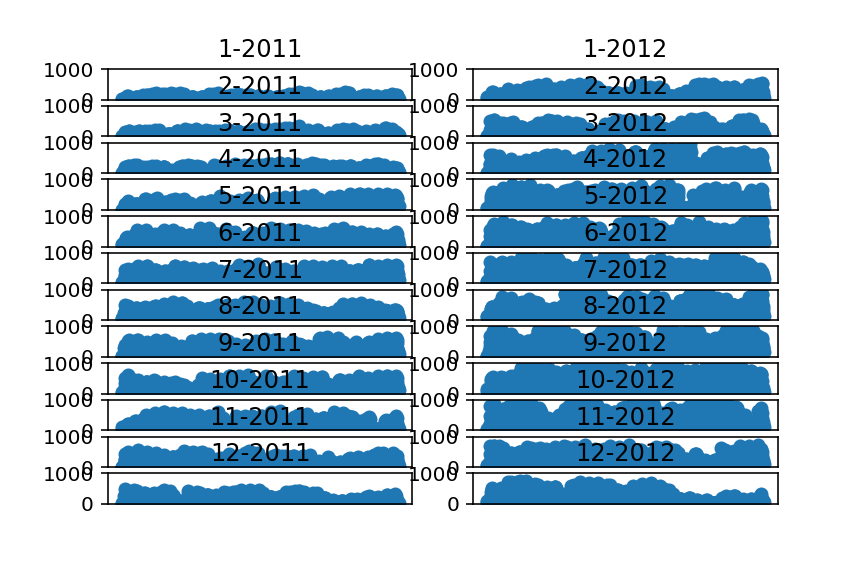

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

years = rent_bike["yr"].unique()
months = rent_bike["mnth"].unique()
fig, axs = plt.subplots(len(months), len(years))

yr_pos = 0
for year in years:
    mnth_pos = 0
    for month in months:
        month_data = rent_bike[(rent_bike['yr'] == year) & (rent_bike['mnth'] == month)]
        x = month_data["hr"].map(str) + "h " + month_data["dteday"].map(str)
        real_year = 2011 if year == 0 else 2012
        subplot = axs[mnth_pos][yr_pos]
        subplot.set_title(f'{month}-{real_year}')
        subplot.scatter(x, month_data['cnt'])
        subplot.set_ylim([0, 1000])
        subplot.axes.get_xaxis().set_visible(False)
        mnth_pos += 1
    yr_pos += 1

## 2. Tratamiento de datos: Missing y Redundancia.

- ***Missing:*** Analizamos si faltan datos o hay navores no numéricos.

In [5]:
#Buscamos NaN o Null para Pandas es lo mismo.
print(rent_bike.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


- **Redundancias:** Elimino columnas no útiles o problemáticas. Ver razonamiento en el informe.

In [6]:
#Eliminamos variables que no deseo
rent_bike= rent_bike.drop(['casual' , 'registered','atemp','instant','dteday', 'season', 'holiday'], axis=1)
#Comprobamos nuestra tabla reducida
rent_bike.head()

,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,6,0,1,0.24,0.81,0.0,16
1,0,1,1,6,0,1,0.22,0.80,0.0,40
2,0,1,2,6,0,1,0.22,0.80,0.0,32
3,0,1,3,6,0,1,0.24,0.75,0.0,13
4,0,1,4,6,0,1,0.24,0.75,0.0,1


## 3. Tratamiento de variables categóricas.

In [7]:
#One-hot encoding para tratar variables categóricas en este caso el dia de la semana, usando pandas get_dummies

#Variables que deben ser convertidas a valores numericos
rent_bike = pd.get_dummies(rent_bike, columns=["yr","mnth", "hr", "weekday", "weathersit"])
    
#Comprobamos nuevas dimensiones, y la tabla resultante    
print('Despues de one-hot encoding:', rent_bike.shape)
print(f'Estas son las columnas resultantest: {rent_bike.columns.tolist()}')
rent_bike.head()

Despues de one-hot encoding: (17379, 54)
Estas son las columnas resultantest: ['workingday', 'temp', 'hum', 'windspeed', 'cnt', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']


,workingday,temp,hum,windspeed,cnt,yr_0,yr_1,mnth_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0.24,0.81,0.0,16,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0.22,0.80,0.0,40,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0.22,0.80,0.0,32,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0.24,0.75,0.0,13,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0.24,0.75,0.0,1,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


## 4. Determinar el conjunto de modelización y el de validación.

In [8]:
from sklearn.model_selection import train_test_split 

#Mezclamos la muestra para evitar si existe orden dentro del conjunto de datos
rent_bike = rent_bike.sample(frac=1)

datos_x = rent_bike.iloc[:,0:9]  #Variables entrada-features
datos_y = rent_bike.iloc[:,9]    #Variable respuesta                 

#Dividimos los datos en 80% entrenamiento y 20% test.
x_train, x_test, y_train, y_test = train_test_split(datos_x , datos_y, test_size=0.20, random_state=50) 


## Implementación.

## 5. Identificar qué métricas de evaluación se utilizarán.

Para prevenir el problema de overfitting hemos limitado el tamaño del árbol definiendo un valor para las observaciones mínimas del nodo terminal. Para cada variable de cada método de aprendizage automático lo hemos obtenido a partir del mejor valor de RMSE. Para el arbol de clasificación la precisión.

## 6. Comparar mediante las medidas que parezcan adecuadas la capacidad predictiva de ambos métodos.

Vamos a usar 2 métricas para evaluar ambos algoritmos:

- **R^2 Score**: También llamada **"coeficinete de determinación"** o **"bondad del ajuste"**. Mide cómo de bien la variable respuesta explica las variables predictoras. 

    Lo mediremos como: **r2_score**(y_test, y_predicha)

        
- **RMSE**: **"Raiz del error Cuadrático Medio"** recoge el promedio de los errores, es decir, la diferencia entre los valores predichos y por el modelo y los valores reales. 

    Lo mediremos como: **sqrt**(**mean_squared_error**(y_test, y_predicha))

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

### Arbol de decisión

Calculating RMSE for min_samples_leaf:1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

<IPython.core.display.Javascript object>


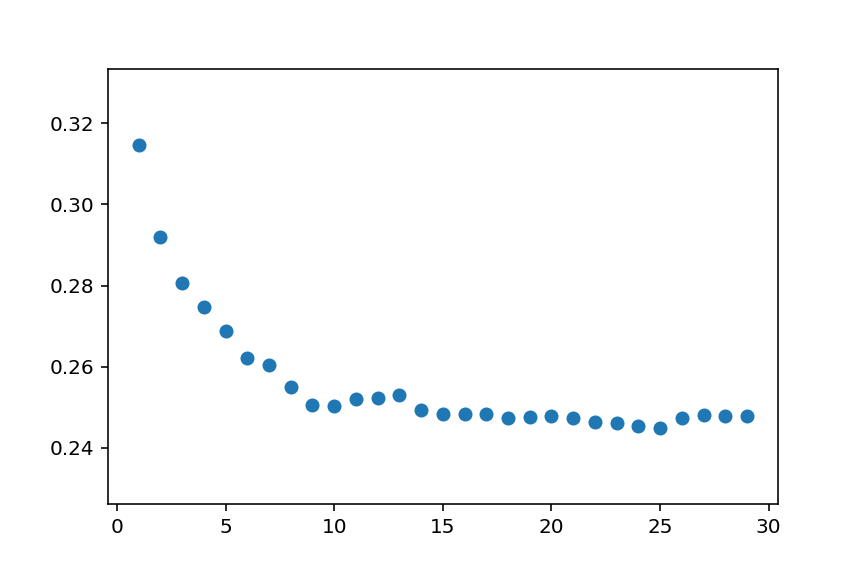

Best min_samples_leaf is 25


In [10]:
#Buscar el mejor número minimo de hojas para el arbol
from sklearn.tree import DecisionTreeRegressor

min_samples_leaf = range(1, 30)
all_rmse_DTR = []
print("Calculating RMSE for min_samples_leaf:", end = '')
for min_leafs in min_samples_leaf:
    print(f'{min_leafs}, ', end = '')
    dec_Tree = DecisionTreeRegressor(random_state = 0, min_samples_leaf = min_leafs)
    dec_Tree.fit(x_train, y_train)
    y_predicha = dec_Tree.predict(x_test)
    all_rmse_DTR.append(sqrt(mean_squared_error(y_test, y_predicha)))

plt.close()
plt.scatter(min_samples_leaf, all_rmse_DTR)
plt.show()

best_tree_min_samples_leaf = min_samples_leaf[all_rmse_DTR.index(min(all_rmse_DTR))]
print(f'Best min_samples_leaf is {best_tree_min_samples_leaf}')

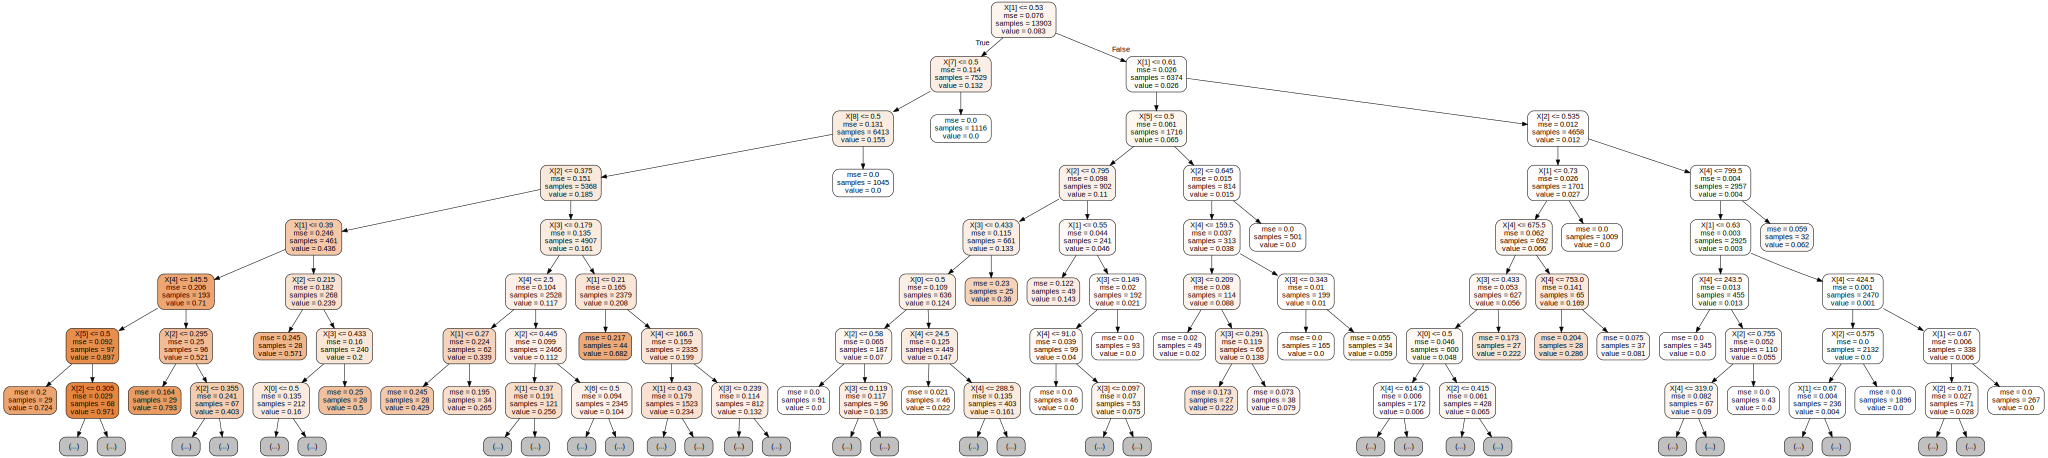

RMSE DecisionTreeRegressor: 0.24482003261839017
R^2 score DecisionTreeRegressor: 0.268507447184002


In [11]:
#Árbol de Decisión
from sklearn.tree import DecisionTreeRegressor

dec_Tree = DecisionTreeRegressor(random_state = 0, min_samples_leaf = best_tree_min_samples_leaf)
dec_Tree.fit(x_train, y_train)
y_predicha = dec_Tree.predict(x_test)

#Importamos las librerias para mostrar el arbol
from sklearn.tree import export_graphviz
from IPython.display import display
from sklearn import tree
import graphviz
# exportamos el modelo a archivo .dot
with open("tree_output.dot", 'w') as f:
     f = tree.export_graphviz(dec_Tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              rounded = True,
                              filled= True )

with open("tree_output.dot") as f:
    dot_graph = f.read()
#Mostramos el arbol    
display(graphviz.Source(dot_graph))

rmse_DTR = sqrt(mean_squared_error(y_test, y_predicha))
r_DTR = r2_score(y_test, y_predicha)

print("RMSE DecisionTreeRegressor:", rmse_DTR)
print("R^2 score DecisionTreeRegressor:", r_DTR)

### Random forest

Calculating RMSE for min_samples_leaf:1, 2, 3, 4, 5, 6, 7, 8, 9, 

<IPython.core.display.Javascript object>


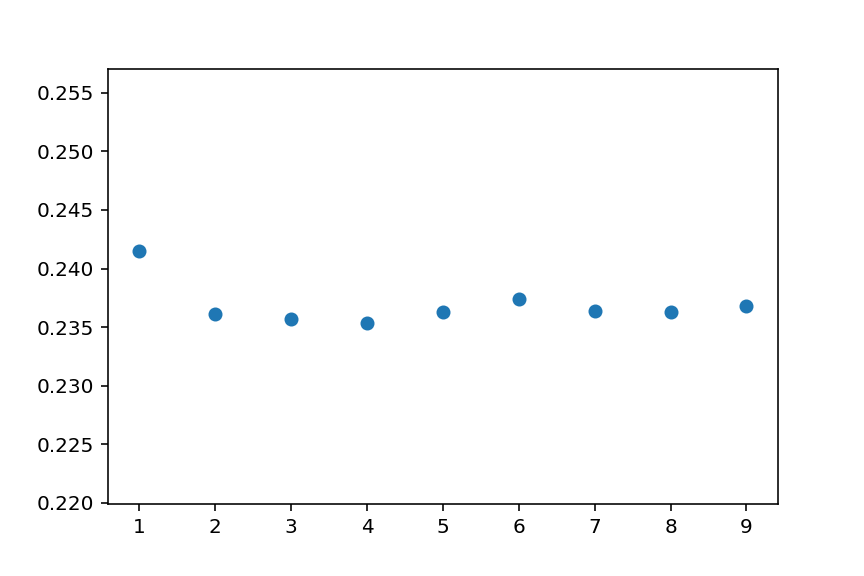

Best min_samples_leaf is 4


In [12]:
#Buscar el mejor número minimo de hojas para random forest
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

min_samples_leaf = range(1, 10)
all_rmse_RFR = []
print("Calculating RMSE for min_samples_leaf:", end = '')
for min_leafs in min_samples_leaf:
    print(f'{min_leafs}, ', end = '')
    dec_Tree = RandomForestRegressor(random_state = 0, min_samples_leaf = min_leafs)
    dec_Tree.fit(x_train, y_train)
    y_predicha = dec_Tree.predict(x_test)
    all_rmse_RFR.append(sqrt(mean_squared_error(y_test, y_predicha)))

plt.close()
plt.scatter(min_samples_leaf, all_rmse_RFR)
plt.show()

best_forest_min_samples_leaf = min_samples_leaf[all_rmse_RFR.index(min(all_rmse_RFR))]
print(f'Best min_samples_leaf is {best_forest_min_samples_leaf}')

Calculating RMSE for n_estimators:1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

<IPython.core.display.Javascript object>


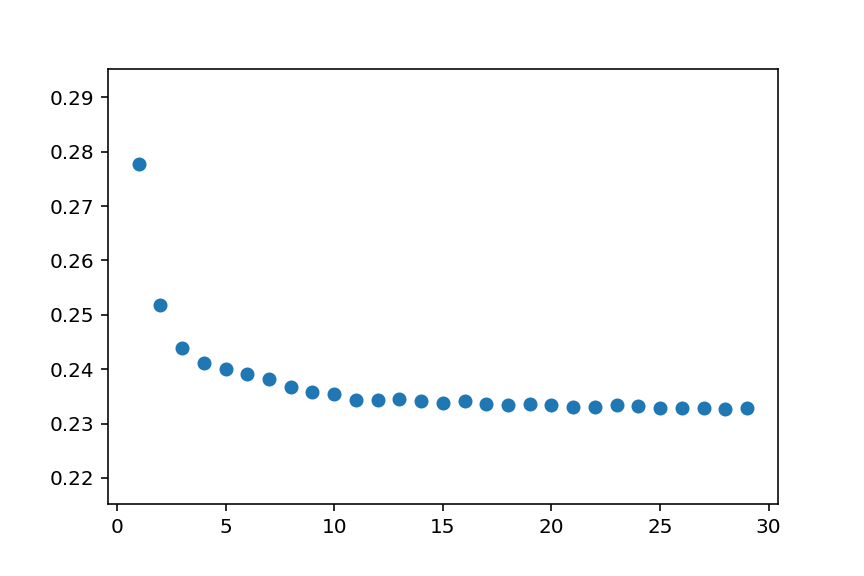

In [13]:
#Buscar el mejor número de arboles con el mejor número minimo de hojas obtenidas en el apartado anterior
from sklearn.ensemble import RandomForestRegressor

n_estimators = range(1, 30, 1)
all_rmse_RFR = []
print("Calculating RMSE for n_estimators:", end = '')
for estimator in n_estimators:
    print(f'{estimator}, ', end = '')
    dec_Tree = RandomForestRegressor(random_state = 0, n_estimators = estimator, min_samples_leaf = best_forest_min_samples_leaf)
    dec_Tree.fit(x_train, y_train)
    y_predicha = dec_Tree.predict(x_test)
    all_rmse_RFR.append(sqrt(mean_squared_error(y_test, y_predicha)))

plt.close()
plt.scatter(n_estimators, all_rmse_RFR)
plt.show()

best_forest_entimator = 10

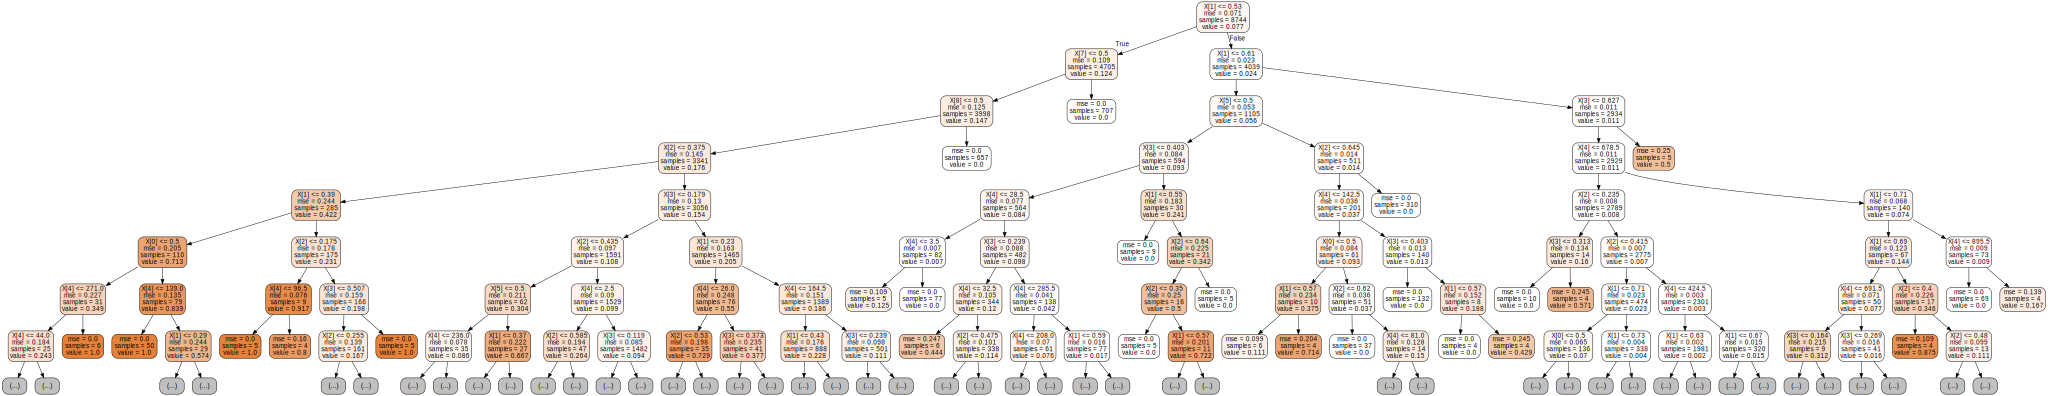

RMSE RandomForestRegressor: 0.23538568888869224
R^2 score RandomForestRegressor: 0.323798521896665


In [14]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(random_state=0, min_samples_leaf=best_forest_min_samples_leaf, n_estimators=best_forest_entimator)
rand_forest.fit(x_train,y_train);
y_predicha = rand_forest.predict(x_test)

#Importamos las librerias para mostrar el arbol
from sklearn.tree import export_graphviz
from IPython.display import display
from sklearn import tree
import graphviz

#Seleccionamos el primer árbol para verlo por pantalla
forest_regressor = rand_forest.estimators_[0]
#Exportamos el modelo a archivo .dot
with open("tree_output.dot", 'w') as f:
     f = tree.export_graphviz(forest_regressor,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              rounded = True,
                              filled= True )

with open("tree_output.dot") as f:
    dot_graph = f.read()
#mostramos el arbol  
display(graphviz.Source(dot_graph))

rmse_RFR = sqrt(mean_squared_error(y_test, y_predicha))
r_RFR = r2_score(y_test, y_predicha)

print("RMSE RandomForestRegressor:", rmse_RFR)
print("R^2 score RandomForestRegressor:",r_RFR)

## 7. Comparar los resultados obtenidos.

In [15]:
print("% mejora RMSE usando random forest regresion:",(rmse_DTR - rmse_RFR) / rmse_DTR * 100)
print("% mejora R^2 score usando random forest regresion:",(r_RFR - r_DTR) / r_DTR * 100)

% mejora RMSE usando random forest regresion: 3.8535832336905114
% mejora R^2 score usando random forest regresion: 20.59200789122744


## 9. Repetir el ejecicio empleando un algoritmo de clasificación

In [16]:
# Prepararamos los datos
from sklearn.model_selection import train_test_split

clf_rent_bike = rent_bike.copy()

clf_data_y = []
for cnt in clf_rent_bike['cnt']:
    clf_data_y.append(1 if (cnt <= 20) else 2)

clf_data_x = clf_rent_bike.drop('cnt', axis=1)

#Dividimos los datos en 80% entrenamiento y 20% test.
clf_x_train, clf_x_test, clf_y_train, clf_y_test = train_test_split(clf_data_x , clf_data_y, test_size=0.20, random_state=50) 

print(f'Training data size: {len(clf_x_train)}')
print(f'Test data size: {len(clf_x_test)}')

Training data size: 13903
Test data size: 3476


Calculating RMSE for max_depth:1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

<IPython.core.display.Javascript object>


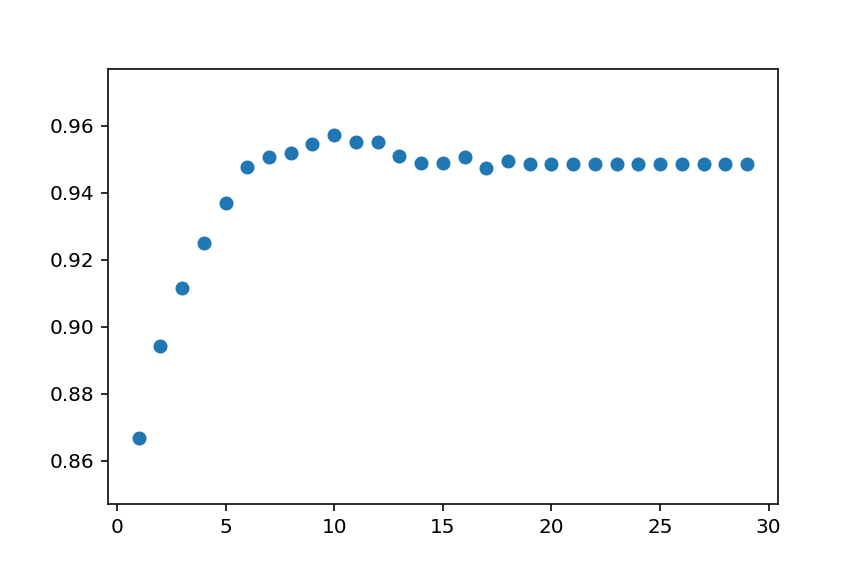

In [17]:
#Buscar el mejor valor de profundidad del árbol a partir de la mejor precisión
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

n_depths = range(1, 30, 1)
all_rmse_RFR = []
print("Calculating RMSE for max_depth:", end = '')
for current_depth in n_depths:
    print(f'{current_depth}, ', end = '')
    classification_tree = DecisionTreeClassifier(random_state = 0, max_depth=current_depth)
    classification_tree.fit(clf_x_train, clf_y_train)
    clf_prediction = classification_tree.predict(clf_x_test)
    conf_matrix = confusion_matrix(clf_y_test, clf_prediction, labels=[1, 2])
    accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / (conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0] + conf_matrix[1][1])
    all_rmse_RFR.append(accuracy)
    
    
plt.close()
plt.scatter(n_depths, all_rmse_RFR)
plt.show()

max_depth = 10

In [18]:
classification_tree = DecisionTreeClassifier(random_state = 0, max_depth=max_depth)
classification_tree.fit(clf_x_train, clf_y_train)

# Hacer la predicción
clf_prediction = classification_tree.predict(clf_x_test)

# Crear matriz de confusión
conf_matrix = confusion_matrix(clf_y_test, clf_prediction, labels=[1, 2])
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / (conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0] + conf_matrix[1][1])
print(f'Accuracy: {accuracy}')
print(f'Confusion matrix:\n     | <=20| >20|\n <=20|  {conf_matrix[0][0]}| {conf_matrix[1][0]}|\n  >20|  {conf_matrix[0][1]}|{conf_matrix[1][1]}|')


Accuracy: 0.9571346375143843
Confusion matrix:
     | <=20| >20|
 <=20|  504| 56|
  >20|  93|2823|


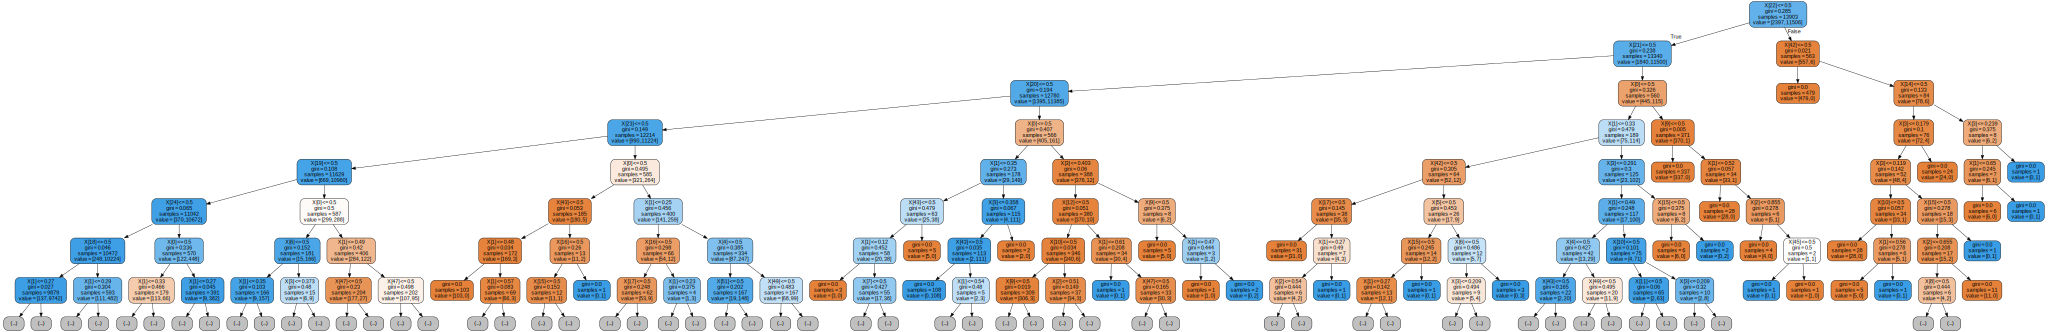

In [19]:
#Seleccionamos árbol de clasificación para verlo por pantalla
cl_tree = classification_tree
#Exportamos el modelo a archivo .dot
with open("tree_output.dot", 'w') as f:
     f = tree.export_graphviz(cl_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              rounded = True,
                              filled= True )

with open("tree_output.dot") as f:
    dot_graph = f.read()
#mostramos el arbol  
display(graphviz.Source(dot_graph))

## Fin Actividad.